In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0, "../code-previous")
sys.path.insert(0, "..")

In [3]:
import pandas as pd
import numpy as np
import nltk
stopwords = nltk.corpus.stopwords.words('english')

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set()
import mutual_information
import matplotlib.pyplot as plt
path2rawdata = '/mnt/disks/vault/wos2017-parsed/'

In [4]:
raw_data_path = "/mnt/disks/vault/analysis-data/raw_data_full/raw_data_full.pql"
data = pd.read_pickle(raw_data_path)

In [5]:
len(data)

738469

In [6]:
data.head()

,ArticleID,Type,Label,PubYear_x,Doctypes,Title,Journal,Journal Abbreviation ISO,PubYear_y,c5
0,A1981LJ96300019,ASCA traditional subject,"Physics, Applied",1981,Article,SURFACE COMPOSITIONAL MODIFICATIONS DURING O-2...,APPLIED PHYSICS LETTERS,Appl. Phys. Lett.,1981,6.0
1,A1981MM58300017,ASCA traditional subject,"Physics, Applied",1981,Article,ELECTRON-PHONON INTERACTION AND DEVIATIONS FRO...,JOURNAL OF PHYSICS F-METAL PHYSICS,,1981,0.0
2,A1981LV54600009,ASCA traditional subject,"Physics, Applied",1981,Article,EXPLOSIVE GENERATION OF ELECTROMAGNETIC-RADIAT...,ZHURNAL TEKHNICHESKOI FIZIKI,Zhurnal Tek. Fiz.,1981,0.0
3,A1981LX06200023,ASCA traditional subject,"Physics, Applied",1981,Article,PIEZOELECTRIC ZNO TRANSDUCERS PRODUCED BY R.F....,THIN SOLID FILMS,Thin Solid Films,1981,7.0
4,A1981LG93900006,ASCA traditional subject,"Physics, Applied",1981,Article,A MODEL FOR INHOMOGENEOUS CONDUCTION IN ANISOT...,JOURNAL OF PHYSICS F-METAL PHYSICS,,1981,3.0


In [7]:
# how many journals are present
len(data['Journal'].unique())

280

In [14]:
# Which was the most popular journal in every decade
tmp = data[['Journal']].groupby(['Journal']).size().reset_index(name="count")
tmp.sort_values("count", ascending=False)[:10]

,Journal,count
119,JOURNAL OF APPLIED PHYSICS,95577
50,APPLIED PHYSICS LETTERS,88295
239,REVIEW OF SCIENTIFIC INSTRUMENTS,33857
271,THIN SOLID FILMS,20711
122,JOURNAL OF CRYSTAL GROWTH,20296
143,JOURNAL OF PHYSICS D-APPLIED PHYSICS,18664
221,PHYSICA STATUS SOLIDI A-APPLIED RESEARCH,17743
114,JAPANESE JOURNAL OF APPLIED PHYSICS PART 1-REG...,16312
213,PHILOSOPHICAL MAGAZINE,14989
94,IEEE TRANSACTIONS ON ELECTRON DEVICES,14402


In [18]:
# what is the frequency of articles in top five of these over the years

tmp1 = data[data.Journal == "JOURNAL OF APPLIED PHYSICS"]
tmp2 = data[data.Journal == "APPLIED PHYSICS LETTERS"]
tmp3 = data[data.Journal == "REVIEW OF SCIENTIFIC INSTRUMENTS"]
tmp4 = data[data.Journal == "THIN SOLID FILMS"]
tmp5 = data[data.Journal == "JOURNAL OF CRYSTAL GROWTH"]

tmp1_grouped = tmp1.groupby("PubYear_x").size().reset_index(name="count")
tmp2_grouped = tmp2.groupby("PubYear_x").size().reset_index(name="count")
tmp3_grouped = tmp3.groupby("PubYear_x").size().reset_index(name="count")
tmp4_grouped = tmp4.groupby("PubYear_x").size().reset_index(name="count")
tmp5_grouped = tmp5.groupby("PubYear_x").size().reset_index(name="count")

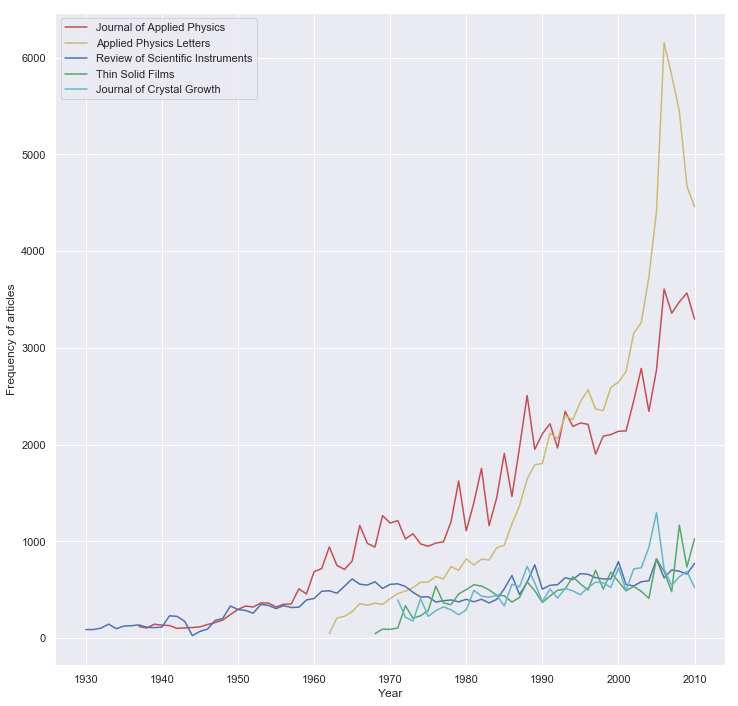

In [23]:
f1 = plt.figure(figsize=(12,12))
ax11 = f1.add_subplot(111)

ax11.plot(tmp1_grouped['PubYear_x'],tmp1_grouped['count'], 'r', label="Journal of Applied Physics")
ax11.plot(tmp2_grouped['PubYear_x'],tmp2_grouped['count'], 'y', label="Applied Physics Letters")
ax11.plot(tmp3_grouped['PubYear_x'],tmp3_grouped['count'], 'b', label="Review of Scientific Instruments")
ax11.plot(tmp4_grouped['PubYear_x'],tmp4_grouped['count'], 'g', label="Thin Solid Films")
ax11.plot(tmp5_grouped['PubYear_x'],tmp5_grouped['count'], 'c', label="Journal of Crystal Growth")


ax11.set_xlabel("Year")
ax11.set_ylabel("Frequency of articles")
ax11.legend()

In [32]:
# Which are the journals with most number of publications since 1995

tmp = data[data.PubYear_x >= 2000][['Journal']].groupby(['Journal']).size().reset_index(name="count")
tmp.sort_values("count", ascending=False)[:10]

,Journal,count
28,APPLIED PHYSICS LETTERS,46499
84,JOURNAL OF APPLIED PHYSICS,31930
129,MATERIALS LETTERS,8894
107,JOURNAL OF PHYSICS D-APPLIED PHYSICS,8324
29,APPLIED SURFACE SCIENCE,8213
87,JOURNAL OF CRYSTAL GROWTH,7994
213,THIN SOLID FILMS,7415
187,REVIEW OF SCIENTIFIC INSTRUMENTS,7323
59,IEEE PHOTONICS TECHNOLOGY LETTERS,7240
153,NANOTECHNOLOGY,7185


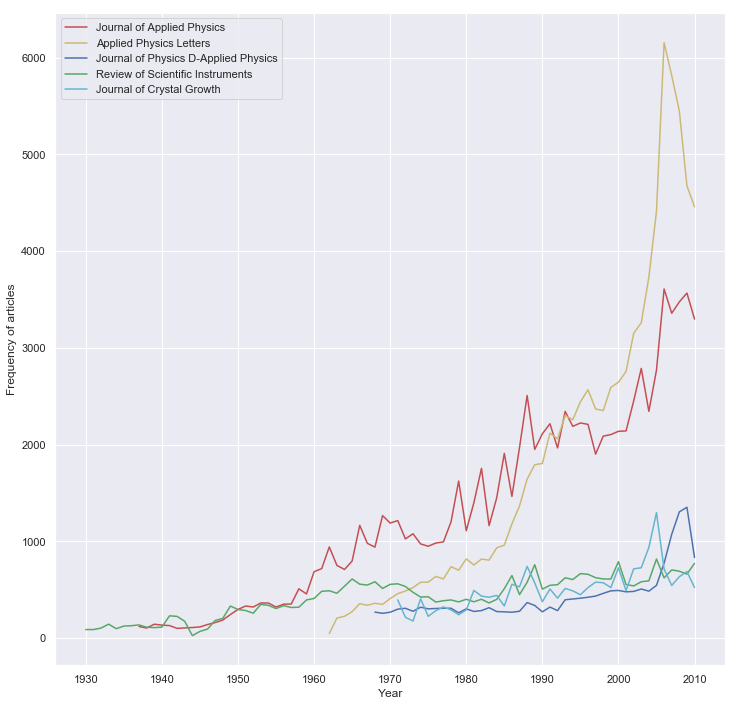

In [33]:
# what is the frequency of articles in top five of these over the years

tmp1 = data[data.Journal == "JOURNAL OF APPLIED PHYSICS"]
tmp2 = data[data.Journal == "APPLIED PHYSICS LETTERS"]
tmp3 = data[data.Journal == "JOURNAL OF PHYSICS D-APPLIED PHYSICS"]
tmp4 = data[data.Journal == "REVIEW OF SCIENTIFIC INSTRUMENTS"]
tmp5 = data[data.Journal == "JOURNAL OF CRYSTAL GROWTH"]

tmp1_grouped = tmp1.groupby("PubYear_x").size().reset_index(name="count")
tmp2_grouped = tmp2.groupby("PubYear_x").size().reset_index(name="count")
tmp3_grouped = tmp3.groupby("PubYear_x").size().reset_index(name="count")
tmp4_grouped = tmp4.groupby("PubYear_x").size().reset_index(name="count")
tmp5_grouped = tmp5.groupby("PubYear_x").size().reset_index(name="count")

f1 = plt.figure(figsize=(12,12))
ax11 = f1.add_subplot(111)

ax11.plot(tmp1_grouped['PubYear_x'],tmp1_grouped['count'], 'r', label="Journal of Applied Physics")
ax11.plot(tmp2_grouped['PubYear_x'],tmp2_grouped['count'], 'y', label="Applied Physics Letters")
ax11.plot(tmp3_grouped['PubYear_x'],tmp3_grouped['count'], 'b', label="Journal of Physics D-Applied Physics")
ax11.plot(tmp4_grouped['PubYear_x'],tmp4_grouped['count'], 'g', label="Review of Scientific Instruments")
ax11.plot(tmp5_grouped['PubYear_x'],tmp5_grouped['count'], 'c', label="Journal of Crystal Growth")


ax11.set_xlabel("Year")
ax11.set_ylabel("Frequency of articles")
ax11.legend()

### Selected Journals for Story Telling - These Journals are top during the early 90s as well as post 2005

__Journal of Applied Physics, Applied Physics Letters, JOURNAL OF PHYSICS D-APPLIED PHYSICS__

__Popular Journal since 2000: Nanotechnology__